<a href="https://colab.research.google.com/github/jadenfix/causal_machinelearning/blob/main/Homework_2_Simulation_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Problem 1: OLS Regression Results ---

--- Regression of ln_wage on ln_Ed, ln_A ---
Coefficients:
const    1.611075
ln_Ed    0.998681
ln_A     1.502110
dtype: float64

Standard Errors:
const    0.004442
ln_Ed    0.001120
ln_A     0.001840
dtype: float64

--- Regression of ln_wage on ln_Ed ---
Coefficients:
const    2.879170
ln_Ed    1.555411
dtype: float64

Standard Errors:
const    0.005372
ln_Ed    0.001146
dtype: float64

--- Regression of ln_wage on ln_Ed, ln_Ex ---
Coefficients:
const    2.226682
ln_Ed    0.498091
ln_Ex    0.771609
dtype: float64

Standard Errors:
const    0.004270
ln_Ed    0.001593
ln_Ex    0.000962
dtype: float64

--- Regression of ln_wage on ln_Ed ---
Coefficients:
const    2.879170
ln_Ed    1.555411
dtype: float64

Standard Errors:
const    0.005372
ln_Ed    0.001146
dtype: float64

--- Regression of ln_wage on ln_Ed, ln_A, ln_Ex ---
Coefficients:
const    1.612008
ln_Ed    0.498445
ln_A     0.999036
ln_Ex    0.501132
dtype: float64

Standard Errors:
const

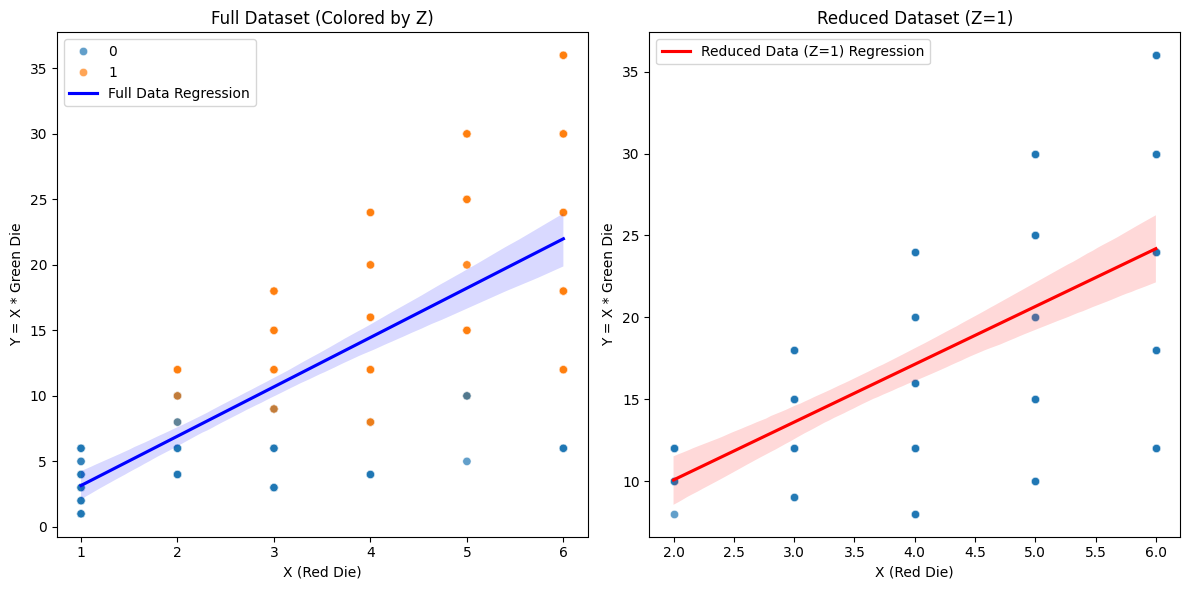


Full dataset size: 200
Reduced dataset (Z=1) size: 122

Coefficient of X (Full Data): 3.7665
Coefficient of X (Reduced Data, Z=1): 3.5304


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# --- Problem 1: Mincer Model Simulation ---

# Set parameters based on the problem description and additions
alpha = 5
n = 1_000_000

# 1. Simulate the exogenous variables (U variables)
np.random.seed(42) # for reproducibility
U_ed = np.random.uniform(0, 20, n)
U_a = np.random.uniform(1, 30, n)
U_w = np.random.normal(0, 1, n)
U_ex = np.random.normal(0, 1, n) # Note: Original PDF had U_ex in wage eq, Addendum uses U_w. Using U_w as per Addendum.
                                 # Note 2: Addendum Ex equation uses U_ex, Wage uses U_w. Sticking to addendum.

# 2. Simulate the endogenous variables based on the economic model (using Addendum corrections)
A = U_a # Ability
Ed = A * U_ed # Education
# Corrected Experience equation from Addendum
Ex = Ed * A * np.exp(U_ex) # Experience

# Corrected Wage equation from Addendum
wage = alpha * (Ed**0.5) * (Ex**0.5) * A * np.exp(U_w)

# 3. Create a pandas DataFrame
df_mincer = pd.DataFrame({
    'U_ed': U_ed,
    'U_a': U_a,
    'U_w': U_w,
    'U_ex': U_ex,
    'A': A,
    'Ed': Ed,
    'Ex': Ex,
    'wage': wage
})

# 4. Take logs of the relevant variables
df_mincer['ln_wage'] = np.log(df_mincer['wage'])
df_mincer['ln_Ed'] = np.log(df_mincer['Ed'])
df_mincer['ln_Ex'] = np.log(df_mincer['Ex'])
df_mincer['ln_A'] = np.log(df_mincer['A'])

# --- OLS Regressions for Problem 1 ---

# Helper function to run OLS and print results
def run_ols(df, y_var, x_vars):
    """Runs OLS regression and prints coefficients and standard errors."""
    Y = df[y_var]
    X = df[x_vars]
    X = sm.add_constant(X) # Add an intercept term
    model = sm.OLS(Y, X)
    results = model.fit()
    print(f"\n--- Regression of {y_var} on {', '.join(x_vars)} ---")
    print(f"Coefficients:\n{results.params}")
    print(f"\nStandard Errors:\n{results.bse}")
    # print(results.summary()) # Optional: print full summary
    return results

print("--- Problem 1: OLS Regression Results ---")

# 5. Regression: ln_wage on ln_Ed and ln_A
results_5 = run_ols(df_mincer, 'ln_wage', ['ln_Ed', 'ln_A'])

# 6. Regression: ln_wage on ln_Ed (without ln_A)
results_6 = run_ols(df_mincer, 'ln_wage', ['ln_Ed'])

# 7. Regression: ln_wage on ln_Ed and ln_Ex
results_7 = run_ols(df_mincer, 'ln_wage', ['ln_Ed', 'ln_Ex'])

# 8. Regression: ln_wage on ln_Ed (without ln_Ex)
# Note: This is the same as step 6, running again for clarity based on numbering
results_8 = run_ols(df_mincer, 'ln_wage', ['ln_Ed'])

# 9. Regression: ln_wage on ln_Ed, ln_A, and ln_Ex
results_9 = run_ols(df_mincer, 'ln_wage', ['ln_Ed', 'ln_A', 'ln_Ex'])


# --- Problem 2: Dice Model 1 Simulation (for demonstration) ---

# Simulate dice rolls (1-6)
np.random.seed(123)
n_obs_p2 = 100
U_x_p2 = np.random.randint(1, 7, n_obs_p2)
U_y_p2 = np.random.randint(1, 7, n_obs_p2)
U_z_p2 = np.random.randint(1, 7, n_obs_p2)

# Generate X, Y, Z
X_p2 = U_x_p2
Y_p2 = U_y_p2
Z_p2 = X_p2 + Y_p2 + U_z_p2

# Create DataFrame
df_p2 = pd.DataFrame({'U_x': U_x_p2, 'U_y': U_y_p2, 'U_z': U_z_p2,
                      'X': X_p2, 'Y': Y_p2, 'Z': Z_p2})

print("\n\n--- Problem 2: OLS Regression Results (Simulated Data) ---")

# 1. Regression: Y on X
results_p2_1 = run_ols(df_p2, 'Y', ['X'])

# 2. Regression: Y on X, controlling for Z
results_p2_2 = run_ols(df_p2, 'Y', ['X', 'Z'])

# 4. Generate Z2 and run regression: Y on X and Z2
# Assuming U = U_z as U is not defined otherwise
df_p2['Z2'] = df_p2['X'] + df_p2['U_z']
results_p2_4 = run_ols(df_p2, 'Y', ['X', 'Z2'])


# --- Problem 3: Dice Model 2 Simulation ---

np.random.seed(456)
n_obs_p3 = 200
U_x_p3 = np.random.randint(1, 7, n_obs_p3)
U_y_p3 = np.random.randint(1, 7, n_obs_p3)
U_z_p3 = np.random.randint(1, 7, n_obs_p3)

# Generate X, Y, Z
X_p3 = U_x_p3
Y_p3 = X_p3 * U_y_p3
Z_p3 = (Y_p3 + U_z_p3 > 12).astype(int) # Indicator variable: 1 if Y+U_z > 12, else 0

# Create DataFrame
df_p3 = pd.DataFrame({'U_x': U_x_p3, 'U_y': U_y_p3, 'U_z': U_z_p3,
                      'X': X_p3, 'Y': Y_p3, 'Z': Z_p3})

print("\n\n--- Problem 3: OLS Regression Results ---")

# 3. Regression: Y on X (Full Dataset)
results_p3_3 = run_ols(df_p3, 'Y', ['X'])

# 4. Regression: Y on X (Reduced Dataset where Z=1)
df_p3_reduced = df_p3[df_p3['Z'] == 1].copy()
results_p3_4 = run_ols(df_p3_reduced, 'Y', ['X'])

# 5. Visualization for comparison
print("\n\n--- Problem 3: Visualization ---")
plt.figure(figsize=(12, 6))

# Scatter plot for full data
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_p3, x='X', y='Y', hue='Z', alpha=0.7)
sns.regplot(data=df_p3, x='X', y='Y', scatter=False, color='blue', label='Full Data Regression')
plt.title('Full Dataset (Colored by Z)')
plt.xlabel('X (Red Die)')
plt.ylabel('Y = X * Green Die')
plt.legend()

# Scatter plot for reduced data (Z=1)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_p3_reduced, x='X', y='Y', alpha=0.7)
sns.regplot(data=df_p3_reduced, x='X', y='Y', scatter=False, color='red', label='Reduced Data (Z=1) Regression')
plt.title('Reduced Dataset (Z=1)')
plt.xlabel('X (Red Die)')
plt.ylabel('Y = X * Green Die')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nFull dataset size: {len(df_p3)}")
print(f"Reduced dataset (Z=1) size: {len(df_p3_reduced)}")
print(f"\nCoefficient of X (Full Data): {results_p3_3.params['X']:.4f}")
print(f"Coefficient of X (Reduced Data, Z=1): {results_p3_4.params['X']:.4f}")